In [20]:
import numpy as np
import ast
import matplotlib.pyplot as plt


In [21]:
with open('output_movenet.txt', 'r') as file:
    matrix = [ast.literal_eval(line) for line in file]

matrix = np.array(matrix)

matrix

array([[264, 314],
       [265, 314],
       [264, 314],
       ...,
       [259, 318],
       [259, 318],
       [259, 318]])

In [22]:
matrix_t = matrix.transpose()
x = matrix_t[0]
y = matrix_t[1]

down/up

In [51]:
arr = []
wait = 0
lock = False
for i in range(len(matrix_t[0])):
    arr.append(matrix_t[0][i])
    if len(arr) > 5:
        arr.pop(0)
    if lock == False and len(arr) == 5 and arr == sorted(arr) and arr[4] - arr[0] > 30:
        print(i)
        print("crouch")
        lock = True
    if lock == False and len(arr) == 5 and arr == sorted(arr, reverse = True) and arr[4] - arr[0] < -30:
        print(i)
        print("jump")
        lock = True
    if lock == True:
        wait += 1
        if wait > 60:
            wait = 0
            lock = False

392
crouch
453
jump


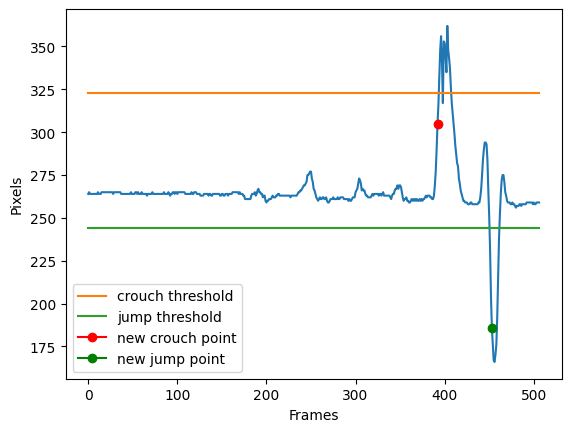

In [60]:
crouch_thres = len(x)*[323]
jump_thres = len(x)*[244]
plt.plot(range(len(x)), x)
plt.plot(range(len(x)), crouch_thres, label = "crouch threshold")
plt.plot(range(len(x)), jump_thres, label = "jump threshold")
plt.plot(392, x[392], marker = "o", color = 'red', label = "new crouch point")
plt.plot(453, x[453], marker = "o", color = 'green', label = 'new jump point')
plt.legend()
plt.xlabel("Frames")
plt.ylabel("Pixels")
plt.show()

left/right

In [25]:
arr = []
lock = False
for i in range(len(matrix_t[1])):
    arr.append(matrix_t[1][i])
    if len(arr) > 5:
        arr.pop(0)
    if lock == False and len(arr) == 5 and arr == sorted(arr) and arr[4] - arr[0] > 30:
        print(i)
        print("left")
        lock = True
    if lock == False and len(arr) == 5 and arr == sorted(arr, reverse = True) and arr[4] - arr[0] < -30:
        print(i)
        print("right")
        lock = True
    if lock == True and len(arr) == 5 and arr == sorted(arr) and arr[4] - arr[0] <= 30:
        lock = False
    if lock == True and len(arr) == 5 and arr == sorted(arr, reverse = True) and arr[4] - arr[0] >= -30:
        lock = False

187
left
248
right
304
right
346
left


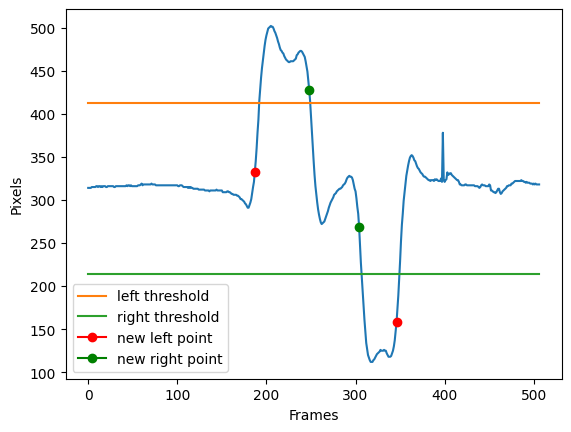

In [61]:
left_thres = len(y)*[412]
right_thres = len(y)*[214]
plt.plot(range(len(y)), y)
plt.plot(range(len(x)), left_thres, label = "left threshold")
plt.plot(range(len(x)), right_thres, label = "right threshold")
plt.plot(187, y[187], marker = "o", color = 'red', label = "new left point")
plt.plot(248, y[248], marker = "o", color = 'green', label = "new right point")
plt.plot(304, y[304], marker = "o", color = 'green')
plt.plot(346, y[346], marker = "o", color = 'red')
plt.legend()
plt.xlabel("Frames")
plt.ylabel("Pixels")
plt.show()